# Integrated Project

# Research on video games sales patterns

I work for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. 

My goal is to identify patterns that determine whether a game succeeds or not. This will allow me to spot potential big winners and plan advertising campaigns.

I have data going back to 2016. I'm planning a campaign for 2017. 

## Open the data file and study the general information. 

### Read the data file and import the necessary libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
from scipy import stats as st
%matplotlib inline

pd.set_option('display.max_rows', None)

try:
    df_games = pd.read_csv('games.csv')
    df1_games = pd.read_csv('games.csv')
except:
    df_games = pd.read_csv('/datasets/games.csv')

print('Files read successfully')

Files read successfully


### 1. Study the general information:

In [2]:
df_games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df_games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [5]:
df_games.describe(include=object)

,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


### Conclusion:

We opened the file, studied the general information.
There are 16715 rows of data.
We found the following issues in the dataset, that we will fix in the next step:
* Column names should be changed to lower case.
* user_score column type should be float (score is a number, not a string), year_of_release should be int (years are int).
* We have missing values in 6 columns (name, year_of_release, genre, critic_Score, user_Score, rating).
* user_score has 'tbd' value, which we will replace in the next step. 'To be Determined' - There is no actual value, so I'll treat it as NaN.

The data could potentially contain outliers, according to the data description.

### 2. Prepare the data:

* **Replacing column names:**

In [6]:
df_games.columns = df_games.columns.str.lower()
df_games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

* **Fill missing values:**

In [7]:
df_games.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [8]:
df_games.isnull().sum()/len(df_games)

name               0.000120
platform           0.000000
year_of_release    0.016093
genre              0.000120
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513192
user_score         0.400897
rating             0.404786
dtype: float64

2 rows missing name and genre value, let's check if it's the same rows: 

In [9]:
df_games[df_games['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


It's indeed the same rows. More values are missing from both games, while they released a long time ago (1993), we don't know their names and the sales are minimal. We are safe to remove those rows, as they won't affect our analysis:

In [10]:
df_games = df_games.dropna(subset=['name'], axis=0).reset_index(drop=True)
df_games.shape

(16713, 11)

Let's look at some rows missing year and see if there's a pattern:

In [11]:
df_games[df_games['year_of_release'].isnull()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
677,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
718,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
804,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


We can't find any similarity between the different games. We can see games from 2004 (both FIFA and Madden), so we can assume that a possible reason for the missing years is that the games released years ago, their sales numbers aren't that relevant for the current day numbers, so while inputting the data it wasn't important to fill each years for those games. There are no outliers in this column according to the describe result from previous the step, and the amount of missing rows is negligible, so we can fill the missing values with the mean of the games from the same platform and genre.

In [12]:
df_games['year_of_release'].fillna(df_games.groupby(['platform','genre'])['year_of_release'].transform('mean'),inplace=True)
df_games['year_of_release'].isnull().sum()

0

We'll change the type to int:

In [13]:
df_games['year_of_release'] = np.floor(df_games['year_of_release']).astype(int)

We have missing values in the rating column, let's take a look and see if there's a pattern:

In [14]:
df_games['rating'].isnull().sum()

6764

In [15]:
df_games[df_games['rating'].isnull()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,Super Mario World,SNES,1990,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,Super Mario Land,GB,1989,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


Again, there doesn't seem to be a pattern for the missing rating values. 40% of the games missing it. Possible reason is a human error while inputting the data. Some of the the games that missing rating, miss it just in a specific platform. For those, we'll fill the rating with the mode of the ratings. For the rest I'll use the mode of the same genre.

In [16]:
df_games['rating'] = df_games.groupby('name')['rating'].apply(lambda x: x.fillna(x.mode()[0]) if x.value_counts().sum() > 0 else x)
df_games['rating'].isnull().sum()

6327

In [17]:
df_games['rating'].fillna(df_games.groupby(['genre'])['rating'].transform(lambda x: x.fillna(x.mode()[0])),inplace=True)
df_games['rating'].isnull().sum()

0

We are left with missing values in both score columns. Let's see if there's a pattern:

In [18]:
df_games[df_games['critic_score'].isnull()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,T
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,M
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,E
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,T
18,Super Mario World,SNES,1990,Platform,12.78,3.75,3.54,0.55,NaN,NaN,E
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,T
21,Super Mario Land,GB,1989,Platform,10.83,2.71,4.18,0.42,NaN,NaN,E
22,Super Mario Bros. 3,NES,1988,Platform,9.54,3.44,3.84,0.46,NaN,NaN,E


In [19]:
df_games[df_games['user_score'].isnull()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,T
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,M
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,E
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,T
18,Super Mario World,SNES,1990,Platform,12.78,3.75,3.54,0.55,NaN,NaN,E
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,T
21,Super Mario Land,GB,1989,Platform,10.83,2.71,4.18,0.42,NaN,NaN,E
22,Super Mario Bros. 3,NES,1988,Platform,9.54,3.44,3.84,0.46,NaN,NaN,E


Again, no pattern. Possible reasons for the missing scores is that the scores database is newer than the game itself and there is no info on the database for those older games. For example, we have a game from 1985, internet wasn't available to most consumers back then and was limited. We can assume that there wasn't a scores database back then. For the rest of the games, either the are too new, or a human error while inputting the data. First, let's change 'tbd' values in user_score to NaN, and then change the column type to float:

In [20]:
df_games.loc[df_games['user_score'] == 'tbd', 'user_score'] = np.nan
df_games['user_score'] = (df_games['user_score'].astype(float))
df_games['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

Now we can check for a correlation between both user_score and critic_score. If it's a positive correlation, we could use one to fill the other. There are games that miss both values and we'll take a look at them after.

In [21]:
df_games['critic_score'].isnull().sum()


8576

In [22]:
df_games['critic_score'].corr(df_games['user_score'])

0.5808778320767236

We do have quite high positive correlation between user & critic scores. Let's fill the missing scores with median, which would give us a good approximation of the score:

In [23]:
df_games['critic_score'].fillna(df_games.groupby(['user_score'])['critic_score'].transform('median'),inplace=True)
df_games['critic_score'].isnull().sum()

8014

Let's do the same for 'user_score':

In [24]:
df_games['user_score'].isnull().sum()

9123

In [25]:
df_games['user_score'].fillna(df_games.groupby(['critic_score'])['user_score'].transform('median'),inplace=True)
df_games['user_score'].isnull().sum()

8003

Let's try to fill the remaining for both using the median based on same rating and platform:

In [26]:
df_games['critic_score'].fillna(df_games.groupby(['rating', 'platform'])['critic_score'].transform('median'),inplace=True)
df_games['critic_score'].isnull().sum()

1130

In [27]:
df_games['user_score'].fillna(df_games.groupby(['rating', 'platform'])['user_score'].transform('median'),inplace=True)
df_games['user_score'].isnull().sum()

1130

Let's try to fill the remaining for both using the median based on same rating:

In [28]:
df_games['critic_score'].fillna(df_games.groupby(['rating'])['critic_score'].transform('median'),inplace=True)
df_games['critic_score'].isnull().sum()

0

In [29]:
df_games['user_score'].fillna(df_games.groupby(['rating'])['user_score'].transform('median'),inplace=True)
df_games['user_score'].isnull().sum()

0

In [30]:
df_games.isnull().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

* **Check for duplicates:**

In [31]:
df_games.duplicated().sum()

0

* **Total sales (the sum of sales in all regions) for each game:**

In [32]:
df_games['total_sales'] = df_games['na_sales'] + df_games['eu_sales'] + df_games['jp_sales'] + df_games['other_sales']
df_games['total_sales'].head()

0    82.54
1    40.24
2    35.52
3    32.77
4    31.38
Name: total_sales, dtype: float64

### Conclusion:

We dealt with every problem we found in the previous step: missing values, data types change, changed column names to lowercase, made sure there are no duplicates and added 'total_sales' columns which we'll use later in the project.

### 3. Analyze the data:

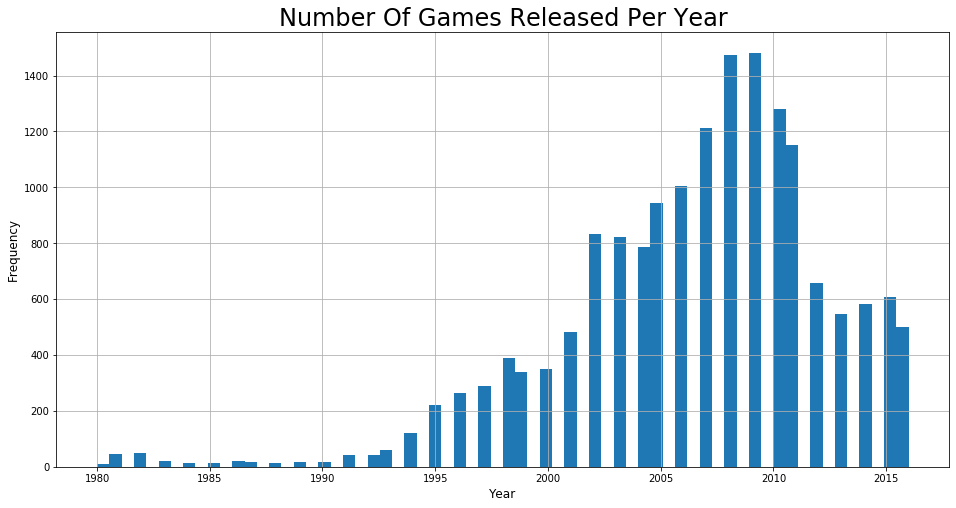

In [33]:
df_games.hist('year_of_release', bins='auto', figsize=(16,8))
plt.title('Number Of Games Released Per Year', size=24)
plt.xlabel('Year', size=12)
plt.ylabel('Frequency', size=12);


**Most of the games released between 2002 to 2011, minimum of 800 games per year. The amount of games reduced significantly in 2012 onwards. Before 1995, the amount of games per year was negligible.**

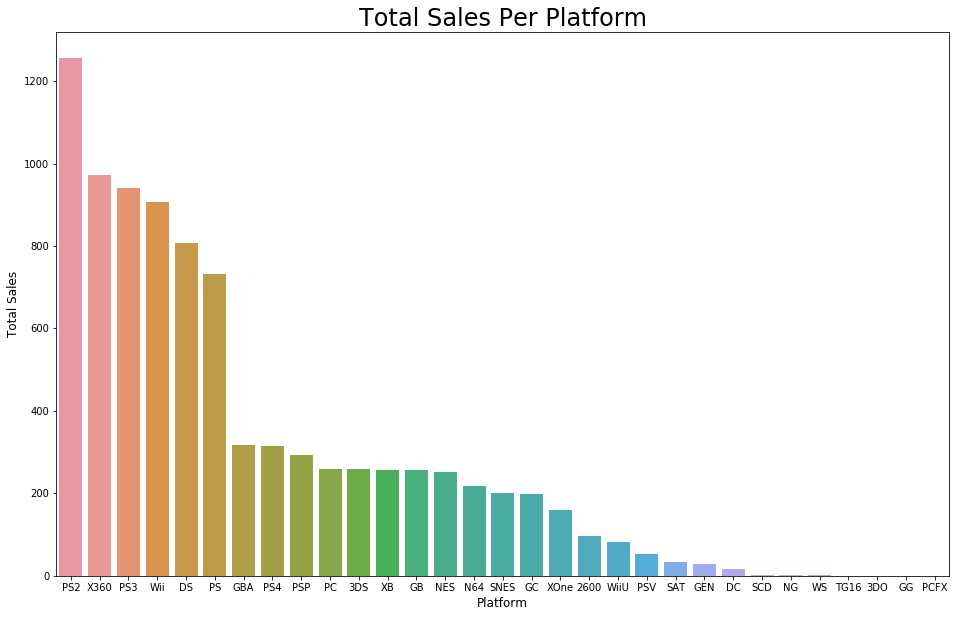

In [34]:
plt.figure(figsize=(16,10))
sales_plot = df_games.pivot_table(index = "platform", values = "total_sales", aggfunc="sum").sort_values('total_sales', ascending=False) 
sns.barplot(x=sales_plot.index,y="total_sales",data = sales_plot)
plt.title('Total Sales Per Platform', size=24)
plt.xlabel('Platform', size=12);
plt.ylabel('Total Sales', size=12);

**We can see that the 6 best selling platforms are: PS2, X360, PS3, Wii, DS, PS. We'll build a distribution for each of those platforms based on data for each year.**

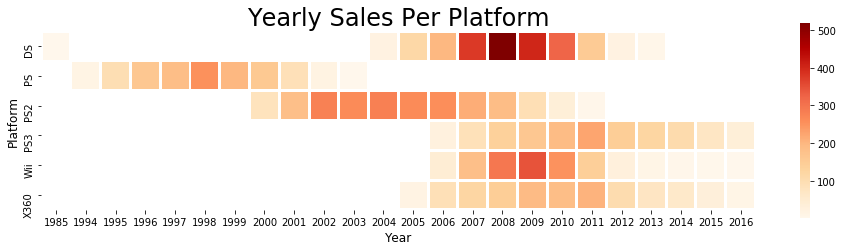

In [35]:
platform_sales_year = df_games[df_games['platform'].isin(['PS2','X360','PS3','Wii','DS','PS'])].groupby(["platform","year_of_release"]).size().unstack()
plt.figure(figsize=(16,12))
sns.heatmap(platform_sales_year, square=True, cbar_kws={'shrink' : 0.3}, cmap='OrRd', linewidth=2)
plt.title('Yearly Sales Per Platform', size=24)
plt.xlabel('Year', size=12);
plt.ylabel('Platform', size=12);

**Out of the 6 platforms, 3 platforms (PS3, Wii, X360) have low amount of sales, while the rest (PS2, PS, DS) didn't have a sale for at least 3 years, but used to be very popular for years. We can see that a new PS platform released in 6 years intervals, and the sales faded in around 10 years. 
To build prognosis for 2017, we'll use data from 2012 onwards. We can see that there was a significant decrease in the number of games released in that year, and since then the number of games released per year were in the same range. We can see that platform sales peak is around its 5th year in the market. 3 platforms released in 2016 - x360, Wii, and PS3, so the 5th year is 2011, but as said before the number of games released that year is almost doubled compared to 2012 onwards, so we'll take the data from 2012.**

In [36]:
df_relevant = df_games.query('year_of_release > 2011')
df_relevant.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,76.0,7.2,M,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,69.0,7.5,T,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


In [37]:
df_relevant.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2893 entries, 16 to 16712
Data columns (total 12 columns):
name               2893 non-null object
platform           2893 non-null object
year_of_release    2893 non-null int64
genre              2893 non-null object
na_sales           2893 non-null float64
eu_sales           2893 non-null float64
jp_sales           2893 non-null float64
other_sales        2893 non-null float64
critic_score       2893 non-null float64
user_score         2893 non-null float64
rating             2893 non-null object
total_sales        2893 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 293.8+ KB


In [38]:
df_relevant.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000
mean,2013.913930,0.204563,0.175271,0.066609,0.054013,71.009074,6.902325,0.500456
std,1.411714,0.566045,0.504792,0.241298,0.164452,9.511487,1.210242,1.247759
min,2012.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.200000,0.010000
25%,2013.000000,0.000000,0.000000,0.000000,0.000000,68.000000,6.600000,0.040000
50%,2014.000000,0.030000,0.030000,0.010000,0.010000,71.000000,7.200000,0.120000
75%,2015.000000,0.170000,0.140000,0.050000,0.040000,76.000000,7.500000,0.430000
max,2016.000000,9.660000,9.090000,4.390000,3.960000,97.000000,9.300000,21.050000


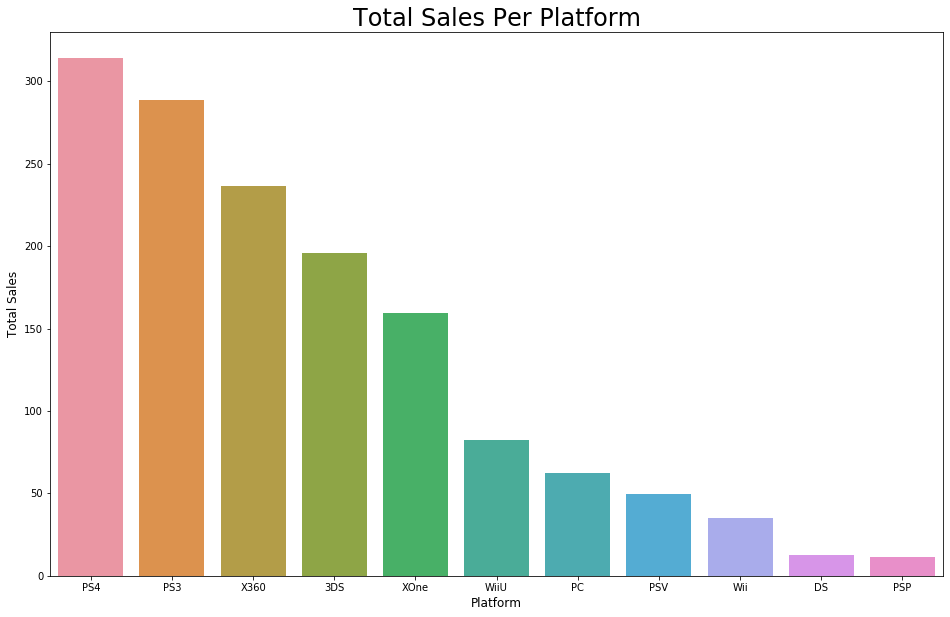

In [39]:
plt.figure(figsize=(16,10))
sales_plot = df_relevant.pivot_table(index = "platform", values = "total_sales", aggfunc="sum").sort_values('total_sales', ascending=False) 
sns.barplot(x=sales_plot.index,y="total_sales",data = sales_plot)
plt.title('Total Sales Per Platform', size=24)
plt.xlabel('Platform', size=12);
plt.ylabel('Total Sales', size=12);

**5 platforms sales are significantly larger than the rest - PS4, PS3, X360, 3DS, XOne. We'll use them for our further analysis.**

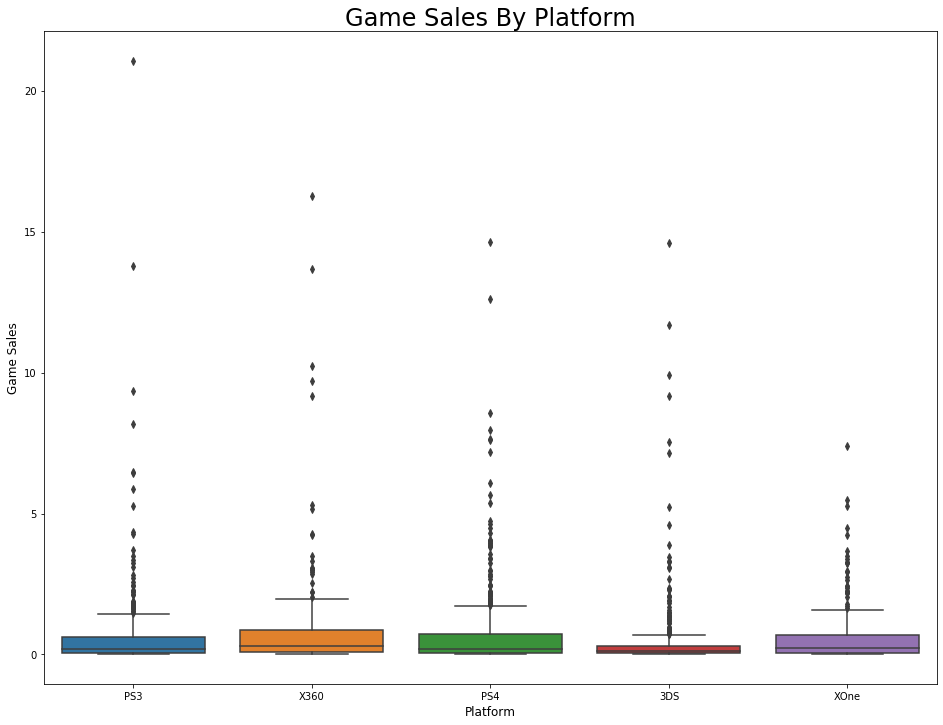

In [40]:
df_relevant_platforms = df_relevant[df_relevant['platform'].isin(['PS4', 'PS3', 'X360', '3DS', 'XOne'])]
plt.figure(figsize=(16,12))
sns.boxplot(x="platform",y="total_sales", data = df_relevant_platforms)
plt.title('Game Sales By Platform', size=24)
plt.xlabel('Platform', size=12);
plt.ylabel('Game Sales', size=12);

**The boxplots look similar. Sales doesn't differ much. We can see that there are outliers for each platforms, the distribution is positively skewed.**

In [41]:
df_relevant_platforms.groupby('platform').agg(Median=('total_sales', 'median'), Mean=('total_sales', 'mean'))

,Median,Mean
platform,,
3DS,0.11,0.486667
PS3,0.20,0.585781
PS4,0.20,0.801378
X360,0.31,0.810068
XOne,0.22,0.645020


**We can see that the distribution is positively skewed because the mean is significantly higher than the median.**

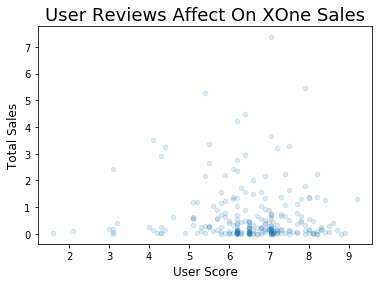

In [42]:
xone = df_relevant[df_relevant['platform']=='XOne']
xone.plot.scatter(y='total_sales', x='user_score', alpha=.15)
plt.title('User Reviews Affect On XOne Sales', size=18);
plt.xlabel('User Score', size=12);
plt.ylabel('Total Sales', size=12);

In [43]:
print('XOne Correlation coefficient between sales and user score: {:.0}'.format(xone['total_sales'].corr(xone['user_score'])))

XOne Correlation coefficient between sales and user score: -0.05


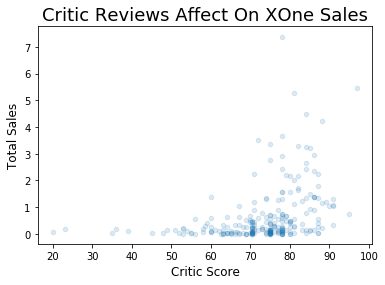

In [44]:
xone = df_relevant[df_relevant['platform']=='XOne']
xone.plot.scatter(y='total_sales', x='critic_score', alpha=.15)
plt.title('Critic Reviews Affect On XOne Sales', size=18);
plt.xlabel('Critic Score', size=12);
plt.ylabel('Total Sales', size=12);

In [45]:
print('XOne Correlation coefficient between sales and critic score: {:.0}'.format(xone['total_sales'].corr(xone['critic_score'])))

XOne Correlation coefficient between sales and critic score: 0.4


**Regarding XOne, there is a positive linear connection between game sales and critic reviews, but not for user reviews.**

In [46]:
ps4 = df_relevant[df_relevant['platform']=='PS4']
x360 = df_relevant[df_relevant['platform']=='X360']

print('PS4 Correlation coefficient between sales and user score: {:.0}'.format(ps4['total_sales'].corr(ps4['user_score'])))
print('X360 Correlation coefficient between sales and user score: {:.0}'.format(x360['total_sales'].corr(x360['user_score'])))
print('PS4 Correlation coefficient between sales and critic score: {:.0}'.format(ps4['total_sales'].corr(ps4['critic_score'])))
print('X360 Correlation coefficient between sales and critic score: {:.0}'.format(x360['total_sales'].corr(x360['critic_score'])))

PS4 Correlation coefficient between sales and user score: -0.05
X360 Correlation coefficient between sales and user score: -0.02
PS4 Correlation coefficient between sales and critic score: 0.3
X360 Correlation coefficient between sales and critic score: 0.3


The results of XOne are very much similar for PS4 and X360. There is a positive linear connection between game sales and critic reviews, but not for user reviews.

In [47]:
df_relevant_platforms.groupby(['name', 'platform'])['total_sales'].sum().sort_values(ascending=False).unstack(1).dropna()

platform,3DS,PS3,PS4,X360,XOne
name,,,,,
Adventure Time: Finn & Jake Investigations,0.09,0.08,0.10,0.09,0.05
Angry Birds Star Wars,0.33,0.29,0.22,0.28,0.17
FIFA 14,0.23,6.46,3.01,4.22,1.16
FIFA 15,0.46,4.28,6.08,2.92,2.18
LEGO Jurassic World,0.62,0.85,0.90,0.87,0.66
LEGO Marvel Super Heroes,0.89,1.83,1.62,2.22,1.05
LEGO Marvel's Avengers,0.18,0.26,0.73,0.32,0.34
LEGO The Hobbit,0.24,0.46,0.60,0.45,0.27
Lego Batman 3: Beyond Gotham,0.45,0.73,0.92,0.89,0.44


**We have total of 16 games that released for all platforms. We'll take the top 10 and look at their sales numbers across platforms:**

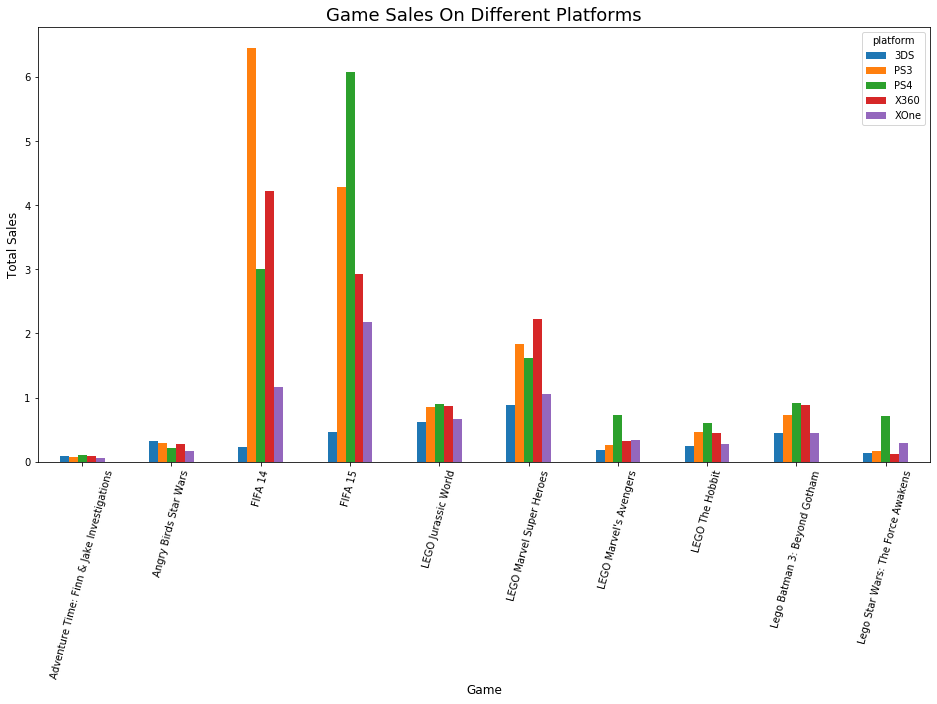

In [48]:
(df_relevant_platforms.groupby(['name', 'platform'])['total_sales']
 .sum().sort_values(ascending=False).unstack(1).dropna()[0:10].plot(kind='bar', figsize=(16,8)))
plt.title('Game Sales On Different Platforms', size=18);
plt.xticks(rotation=75)
plt.xlabel('Game', size=12);
plt.ylabel('Total Sales', size=12);
plt.show()

**We can see that out of the top 10, 2 games had a specific platform with large amount of sales compared to the rest (FIFA 14 and FIFA 15), but other than that, the sales are very much similar, there is no trend for a specific platform with larger sales compared to the rest on those multi platform games.**

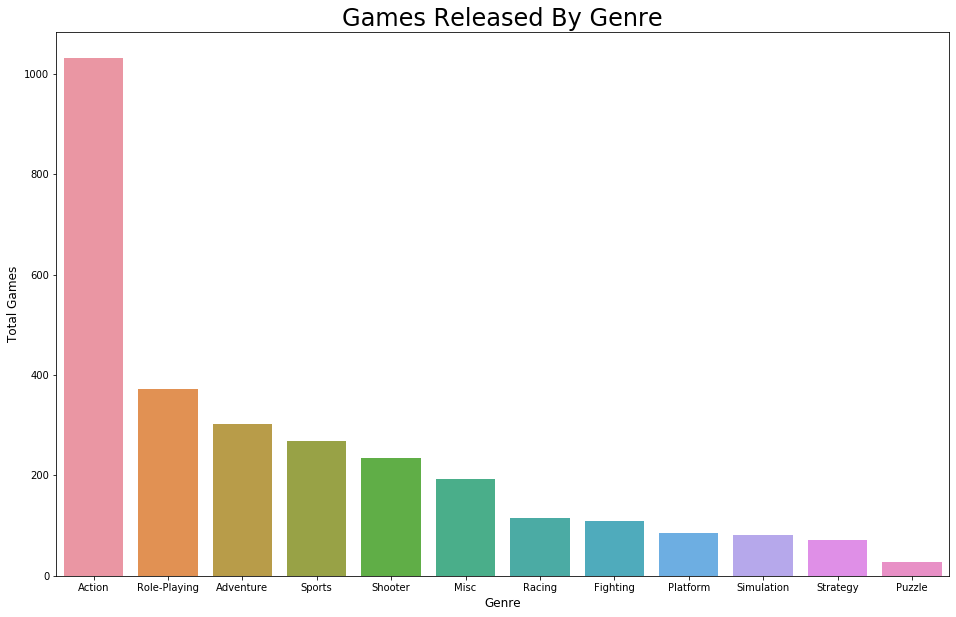

In [49]:
plt.figure(figsize=(16,10))
genre_plot = df_relevant.pivot_table(index = "genre", values = "total_sales", aggfunc="count").sort_values('total_sales', ascending=False) 
sns.barplot(x=genre_plot.index,y="total_sales",data = genre_plot)
plt.title('Games Released By Genre', size=24)
plt.xlabel('Genre', size=12);
plt.ylabel('Total Games', size=12);


**Action genre is by far the most game released genre, let's see if it's the most profitable as well:**

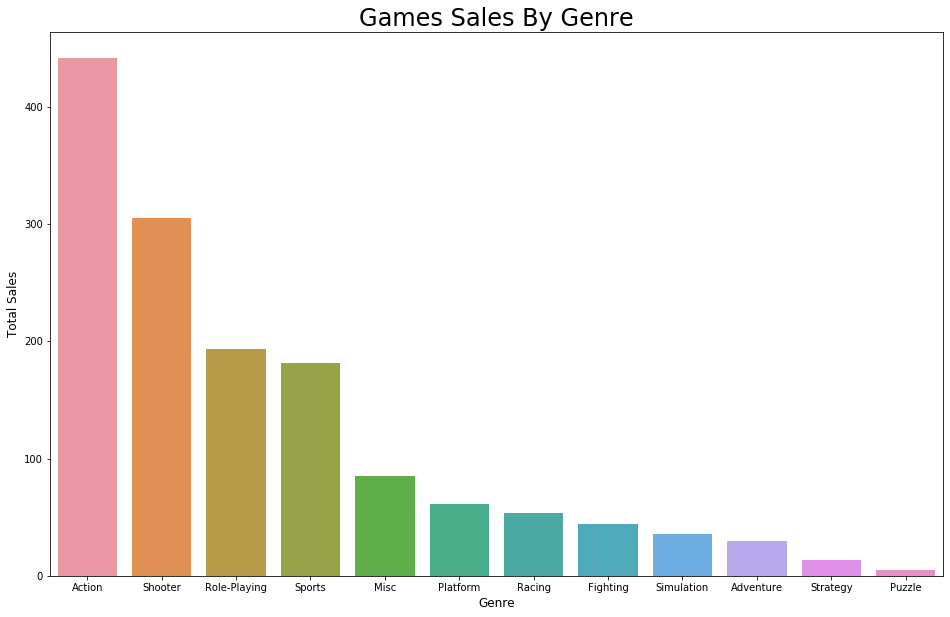

In [50]:
plt.figure(figsize=(16,10))
genre_plot = df_relevant.pivot_table(index = "genre", values = "total_sales", aggfunc="sum").sort_values('total_sales', ascending=False) 
sns.barplot(x=genre_plot.index,y="total_sales",data = genre_plot)
plt.title('Games Sales By Genre', size=24)
plt.xlabel('Genre', size=12);
plt.ylabel('Total Sales', size=12);

**We can see that the total sales revenue of Action games is indeed the largest, and there is a trend that follows the total sales by the amount of games released for specific genre, but there is an exception - Shooter genre games, which seems to be the most popular genre. The total amount of Shooter games is 1/5 of the Action games, but the total sales is around 3/4 of the Action games. The most popular genres are the ones that had the most games released - Action, Shooter, Role-Playing and Sports. Adventure has exceptionally bad sales compared to the amount of games released for that genre. Puzzle, Strategy and Simulation sales are low but so is the amount of games released for those genres.**

### 4.  Create a user profile for each region:

We'll plot pie charts for the top five platforms of each region:

In [51]:
top_platforms_na = df_relevant.groupby(['platform'])['na_sales'].sum().sort_values(ascending = False).reset_index()
top_platforms_na.columns = ['platform','total_na_sales']
others_sales = top_platforms_na.loc[5:,'total_na_sales'].sum()
top_platforms_na = top_platforms_na[0:5].append({'platform':'others', 'total_na_sales':others_sales}, ignore_index=True)
top_platforms_na = top_platforms_na.sort_values(by='total_na_sales', ascending = False).reset_index(drop=True)

top_platforms_eu = df_relevant.groupby(['platform'])['eu_sales'].sum().sort_values(ascending = False).reset_index()
top_platforms_eu.columns = ['platform','total_eu_sales']
others_sales = top_platforms_eu.loc[5:,'total_eu_sales'].sum()
top_platforms_eu = top_platforms_eu[0:5].append({'platform':'others', 'total_eu_sales':others_sales}, ignore_index=True)
top_platforms_eu = top_platforms_eu.sort_values(by='total_eu_sales', ascending = False).reset_index(drop=True)

top_platforms_jp = df_relevant.groupby(['platform'])['jp_sales'].sum().sort_values(ascending = False).reset_index()
top_platforms_jp.columns = ['platform','total_jp_sales']
others_sales = top_platforms_jp.loc[5:,'total_jp_sales'].sum()
top_platforms_jp = top_platforms_jp[0:5].append({'platform':'others', 'total_jp_sales':others_sales}, ignore_index=True)
top_platforms_jp = top_platforms_jp.sort_values(by='total_jp_sales', ascending = False).reset_index(drop=True)

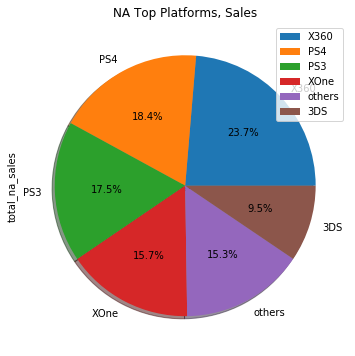

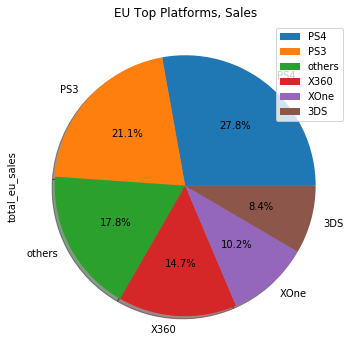

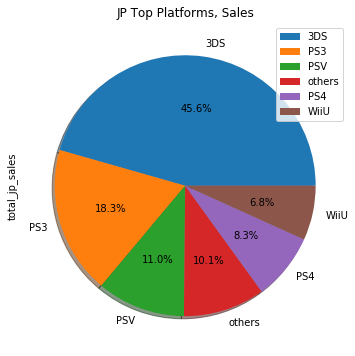

In [52]:
(top_platforms_na.set_index('platform')
                .plot(y='total_na_sales', kind='pie', 
                      title = 'NA Top Platforms, Sales', 
                      figsize=(6, 6), autopct='%1.1f%%', shadow=True)
);
(top_platforms_eu.set_index('platform')
                .plot(y='total_eu_sales', kind='pie', 
                      title = 'EU Top Platforms, Sales', 
                      figsize=(6, 6), autopct='%1.1f%%', shadow=True)
);
(top_platforms_jp.set_index('platform')
                .plot(y='total_jp_sales', kind='pie', 
                      title = 'JP Top Platforms, Sales', 
                      figsize=(6, 6), autopct='%1.1f%%', shadow=True)
);


**Each region platform sales differ. The leading platform for and sales shares between platforms for each region is different. NA top platform is X360, with PS4, PS3 and XOne not far behind. EU has both PS platfroms leading, with PS4 at the top, and the x platforms fall behind. JP is much different compared to NA and EU with 3DS leading the sales with almost 50% of total sales. PS platforms behind, while X platforms sales are very low. The 3DS platform sales in both the NA & EU are very limited, less than 10% of total sales.**

We'll plot pie charts for the top five genres of each region:

In [53]:
top_genres_na = df_relevant.groupby(['genre'])['na_sales'].sum().sort_values(ascending = False).reset_index()
top_genres_na.columns = ['genre','total_na_sales']
others_sales = top_genres_na.loc[5:,'total_na_sales'].sum()
top_genres_na = top_genres_na[0:5].append({'genre':'others', 'total_na_sales':others_sales}, ignore_index=True)
top_genres_na = top_genres_na.sort_values(by='total_na_sales', ascending = False).reset_index(drop=True)

top_genres_eu = df_relevant.groupby(['genre'])['eu_sales'].sum().sort_values(ascending = False).reset_index()
top_genres_eu.columns = ['genre','total_eu_sales']
others_sales = top_genres_eu.loc[5:,'total_eu_sales'].sum()
top_genres_eu = top_genres_eu[0:5].append({'genre':'others', 'total_eu_sales':others_sales}, ignore_index=True)
top_genres_eu = top_genres_eu.sort_values(by='total_eu_sales', ascending = False).reset_index(drop=True)

top_genres_jp = df_relevant.groupby(['genre'])['jp_sales'].sum().sort_values(ascending = False).reset_index()
top_genres_jp.columns = ['genre','total_jp_sales']
others_sales = top_genres_jp.loc[5:,'total_jp_sales'].sum()
top_genres_jp = top_genres_jp[0:5].append({'genre':'others', 'total_jp_sales':others_sales}, ignore_index=True)
top_genres_jp = top_genres_jp.sort_values(by='total_jp_sales', ascending = False).reset_index(drop=True)

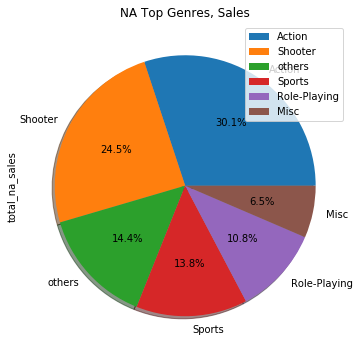

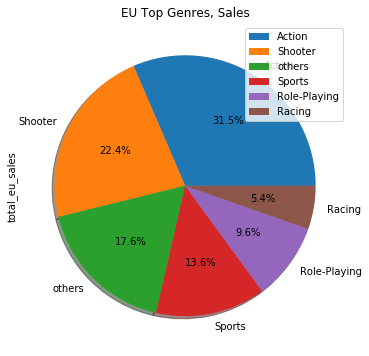

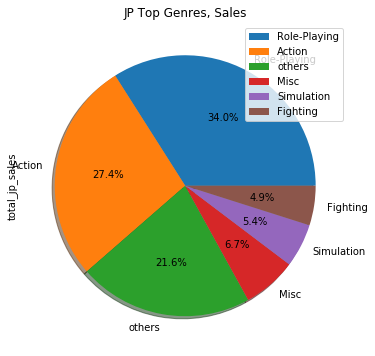

In [54]:
(top_genres_na.set_index('genre')
                .plot(y='total_na_sales', kind='pie', 
                      title = 'NA Top Genres, Sales', 
                      figsize=(6, 6), autopct='%1.1f%%', shadow=True)
);
(top_genres_eu.set_index('genre')
                .plot(y='total_eu_sales', kind='pie', 
                      title = 'EU Top Genres, Sales', 
                      figsize=(6, 6), autopct='%1.1f%%', shadow=True)
);
(top_genres_jp.set_index('genre')
                .plot(y='total_jp_sales', kind='pie', 
                      title = 'JP Top Genres, Sales', 
                      figsize=(6, 6), autopct='%1.1f%%', shadow=True)
);

**Both NA and EU have a very much similar sales shares between genres. Both Action and Shooter are leading in both, with more than 50% of total sales. Sports and Role Playing each has around 10% share for both NA and EU.
JP is, once again, different. Role Playing sales are a third of the total sales. Action is very popular there too with almost a third of the total sales, while the rest genres sales are negligible. It seems like gamers from different regions have different genre preference for their games.**

We'll plot pie charts for the ESRB Ratings sales of each region:

In [55]:
esrb_na = df_relevant.groupby(['rating'])['na_sales'].sum().sort_values(ascending = False).reset_index()
esrb_eu = df_relevant.groupby(['rating'])['eu_sales'].sum().sort_values(ascending = False).reset_index()
esrb_jp = df_relevant.groupby(['rating'])['jp_sales'].sum().sort_values(ascending = False).reset_index()

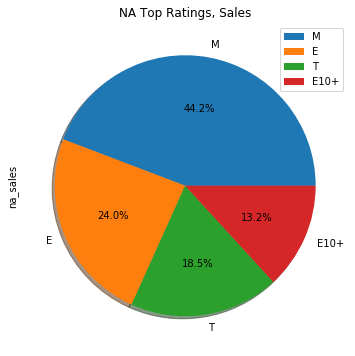

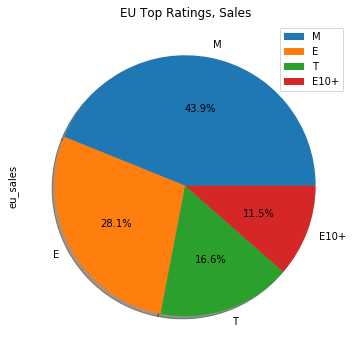

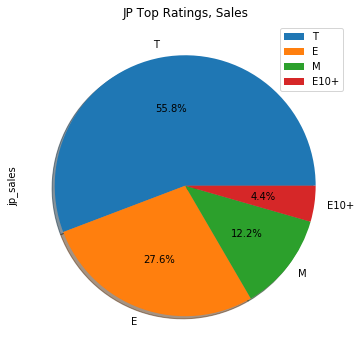

In [56]:
(esrb_na.set_index('rating')
                .plot(y='na_sales', kind='pie', 
                      title = 'NA Top Ratings, Sales', 
                      figsize=(6, 6), autopct='%1.1f%%', shadow=True)
);
(esrb_eu.set_index('rating')
                .plot(y='eu_sales', kind='pie', 
                      title = 'EU Top Ratings, Sales', 
                      figsize=(6, 6), autopct='%1.1f%%', shadow=True)
);
(esrb_jp.set_index('rating')
                .plot(y='jp_sales', kind='pie', 
                      title = 'JP Top Ratings, Sales', 
                      figsize=(6, 6), autopct='%1.1f%%', shadow=True)
);

**Like the genre before, we have a very similar trend for sales in NA and EU regarding the game rating, while JP region is very much different. Mature shares are close to 50% of total sales for both NA and EU, with Everyone games close to a third of the total sales. Teen and E10+ sales are around 10% each. On the other hand, Teen games sale shares are more than 50% in JP, with Everyone games close to a third of the total sales. Mature sales are around 10%, compared to almost half in NA and EU. We can conclude that in JP, there are much more young gamers and the Role Playing games which is very popular in JP being played by all kind of gamers, while in NA and EU gamers, most gamers are matures and like to play Shooter and Action games.**

### 5.  Test the hypotheses:

**Average user ratings of the Xbox One and PC platforms are the same:**

**H0**: Average user ratings of the Xbox One and PC platforms are the same (The means of two statistical populations are equal).

**H1**: Average user ratings of the Xbox One and PC platforms are different (The means of two statistical populations are not equal).


We'll use the typical significance level (or alpha) of 0.05, which means that only in 5% of the case will we reject the null hypothesis when it is true.
We'll test if the populations have equal variances:

In [57]:
xone = df_relevant.query('platform=="XOne"')
pc = df_relevant.query('platform=="PC"')

print("XOne Variance = ",round(np.var(xone["user_score"]),0))
print("PC Variance =",round(np.var(pc["user_score"]),0))
print()

alpha = .05 
result = st.levene(xone["user_score"].dropna(), pc["user_score"].dropna())
print('p-value (levene test): {:.4f}'.format(result.pvalue))

if (result.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We retain the null hypothesis")

XOne Variance =  1.0
PC Variance = 2.0

p-value (levene test): 0.0025
We reject the null hypothesis


The populations don't have equal variances. Hence we will set the equal_var parameter to False.

In [58]:
alpha = .05 
results = st.ttest_ind(xone["user_score"].dropna(), pc["user_score"].dropna(), equal_var=False)

print('p-value: {:.4f}'.format(results.pvalue))


if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We retain the null hypothesis")

p-value: 0.6176
We retain the null hypothesis


We have evidence to support the claim that the average user ratings of the Xbox One and PC platforms are indeed the same.

**Average user ratings for the Action and Sports genres are different:**

**H0**: Average user ratings for the Action and Sports genres are the same (The means of two statistical populations are equal).

**H1**: Average user ratings for the Action and Sports genres are different (The means of two statistical populations are not equal).


We'll use the typical significance level (or alpha) of 0.05, which means that only in 5% of the case will we reject the null hypothesis when it is true.
We'll test if the populations have equal variances:

In [59]:
action = df_relevant.query('genre=="Action"')
sports = df_relevant.query('genre=="Sports"')

print("Action Variance = ",round(np.var(action["user_score"]),0))
print("Sport Variance =",round(np.var(sports["user_score"]),0))
print()

alpha = .05 
result = st.levene(action["user_score"].dropna(), sports["user_score"].dropna())
print('p-value (levene test): {:.4f}'.format(result.pvalue))

if (result.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We retain the null hypothesis")

Action Variance =  1.0
Sport Variance = 3.0

p-value (levene test): 0.0000
We reject the null hypothesis


The populations don't have equal variances. Hence we will set the equal_var parameter to False.

In [60]:
alpha = .05 
results = st.ttest_ind(action["user_score"].dropna(), sports["user_score"].dropna(), equal_var=False)

print('p-value: {:.4f}'.format(results.pvalue))


if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We retain the null hypothesis")

p-value: 0.0000
We reject the null hypothesis


We have evidence to support the claim that the average user ratings for the Action and Sports genres differ.

### 6. Overall conclusion

**The main goal was to identify patterns that determine whether a game succeeds or not. This will allow me to spot potential big winners and plan advertising campaigns.**
First of all, I opened the files and studied the general information. 
Next step was to **prepare the data and make necessary calculations** so I could analyze it:

* Changed column names to lower case.
* Changed data types of 2 columns.
* Filled missing values in 6 columns.
* Made sure there are no duplicates.
* Added 'total_sales' columns.

Then I carried out **Exploratory Data Analysis**:
* Most of the games released between 2002 to 2011, minimum of 800 games per year. The amount of games reduced significantly in 2012 onwards. Before 1995, the amount of games per year was negligible.
* The 6 best selling platforms all time are: PS2, X360, PS3, Wii, DS, PS.
* It takes around 10 years on average for new platforms to appear and for the old ones to fade away. We decided to take data for the past 5 years to build a prognosis for 2017 as we found it would be the most relevant to our situation in 2017.
* The 5 most selling platforms in that time frame are: PS4, PS3, X360, 3DS, XOne. We filtered the data for those platforms as they are the most relevant for our 2017 prognosis.
* Sales doesn't differ much between the different platforms. The distribution of each is positively skewed.
* There is almost no linear connection between sales and user reviews and a weak linear connection between game sales and professional reviews for the XOne platform.
* The sales across platforms are very much similar, there is no trend for a specific platform with larger sales compared to the rest on those multi platform games.
* Action games are the most released and sold. Shooter games sells the larger amount per game. In general, mind sport games (Puzzle, Strategy) sells significantly less than more active games like Action, Shooter and Sports.

Then I **created a user profile for each region**:

**We found that NA and EU behavior overall is very close, while JP is very different**.
* First of all, we found that each region top selling platform is different - NA top platform is X360, with PS4, PS3 and XOne not far behind. EU has both PS platfroms leading, with PS4 at the top, and the x platforms fall behind. JP is much different compared to NA and EU with 3DS leading the sales with almost 50% of total sales. PS platforms behind, while X platforms sales are very low. The 3DS platform sales in both the NA & EU are very limited, less than 10% of total sales.
* Both NA and EU have a very much similar sales shares between genres. Both Action and Shooter are leading in both, with more than 50% of total sales. Sports and Role Playing each has around 10% share for both NA and EU.
JP is, once again, different. Role Playing sales are a third of the total sales. Action is very popular there too with almost a third of the total sales, while the rest genres sales are negligible. It seems like gamers from different regions have different genre preference for their games.
* Like the genre before, we have a very similar trend for sales in NA and EU regarding the game rating, while JP region is very much different. Mature shares are close to 50% of total sales for both NA and EU, with Everyone games close to a third of the total sales. Teen and E10+ sales are around 10% each. On the other hand, Teen games sale shares are more than 50% in JP, with Everyone games close to a third of the total sales. Mature sales are around 10%, compared to almost half in NA and EU. We can conclude that in JP, there are much more young gamers and the Role Playing games which is very popular in JP being played by all kind of gamers, while in NA and EU gamers, most gamers are matures and like to play Shooter and Action games.

I **tested the hypotheses** and found:
* The average user ratings of the Xbox One and PC platforms are the same.
* The average user ratings for the Action and Sports genres differs.




Recommendations for the client: 

To finish our conclusions part, here are my recommendations for the client:
* Treat NA and EU the same advertising wise. Those regions are very much similar, while JP is different from both.
* Action games are very popular over the 3 regions. It would be wise to advertise Action games in all regions.
* Shooter games are very popular in the NA & EU, so it would be wise to advertise Shooter games there.
* Role-Playing games are very popular in JP region. It would be wise to advertise Role-Playing there.
* Mature rated games are very popular in the NA & EU, so it would be wise to plan advertising campaigns in the related places like internet banner ads in main sites, ads in the newspapers and magazines, mature TV channels, for example sports TV channels, etc.
* Teen rated games are very popular in JP region, so it would be wise to plan advertising campaigns in the related places, like kids TV channels, kids papers, etc.